# <CENTER>      TO PREDICT MINUTES to GOALRATIO OF EPL SOCCER DATASET

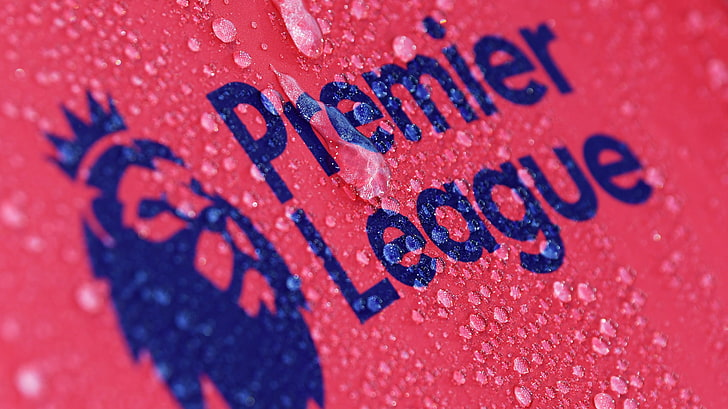

## ATTRIBUTES DETAILS

### 1. PlayerName
### 2. Club
### 3. DistanceCovered
### 4. Goals
### 5. MinutestoGoalRatio
### 6. ShotsPerGame
### 7. AgentCharges
### 8. BMI
### 9. Cost
### 10.PreviousClubCost
### 11.Height
### 12.Weight
### 13.Score


## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

### LOADING DATASET

In [2]:
data=pd.read_csv("EPL_Soccer_MLR_LR.csv")
data.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


#### NUMBER OF ROWS AND COLUMNS

In [3]:
data.shape

(202, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


### CHECKING NULL VALUES

In [5]:
data.isnull().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

### DUPLICATES

In [6]:
data.duplicated().sum()

0

## UNIVARIATE ANALYSIS

### HIST PLOT

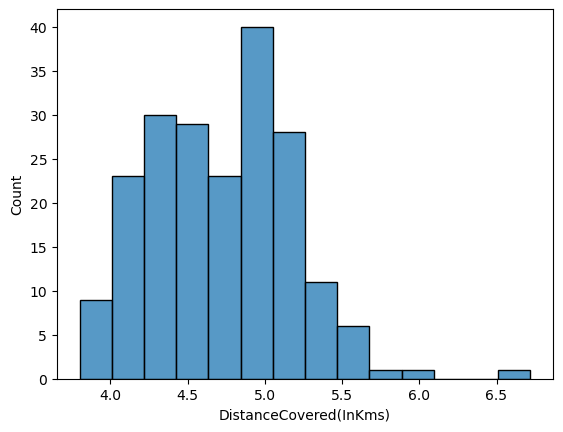

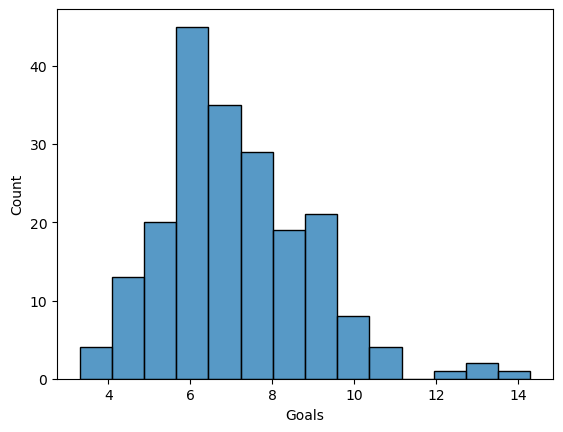

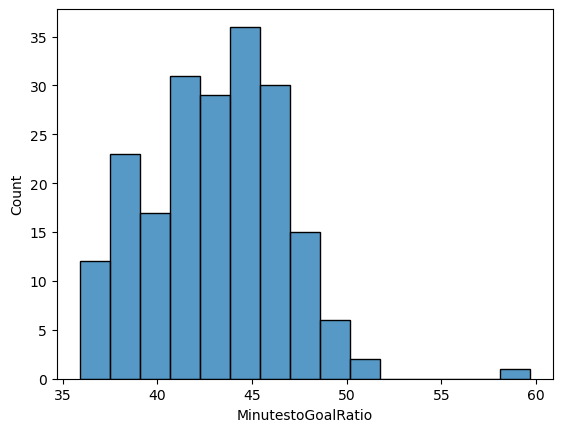

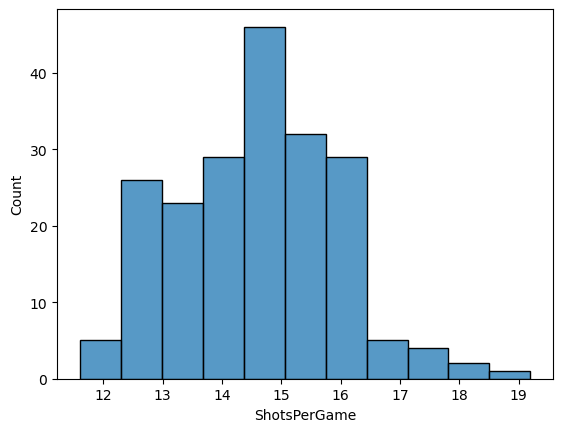

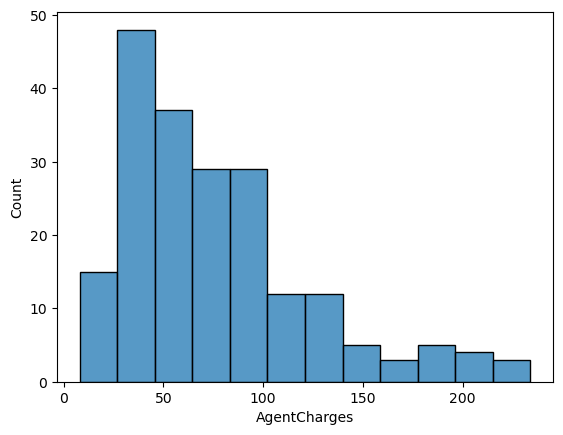

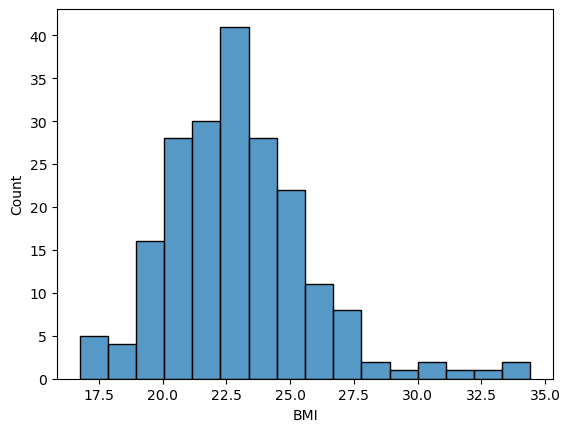

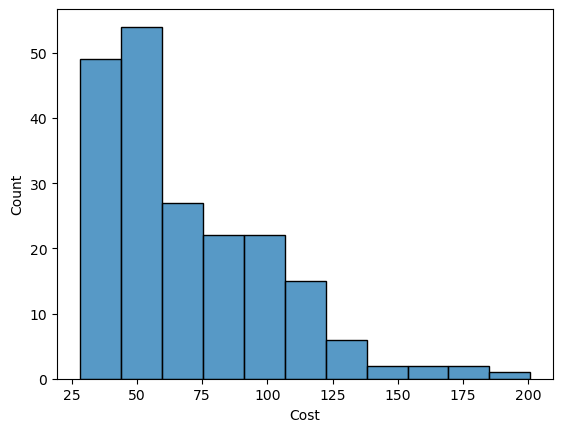

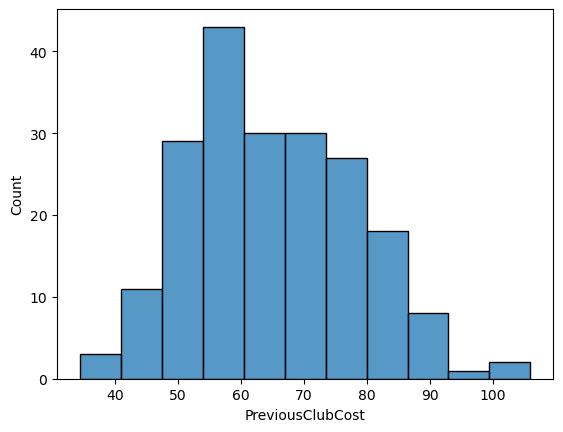

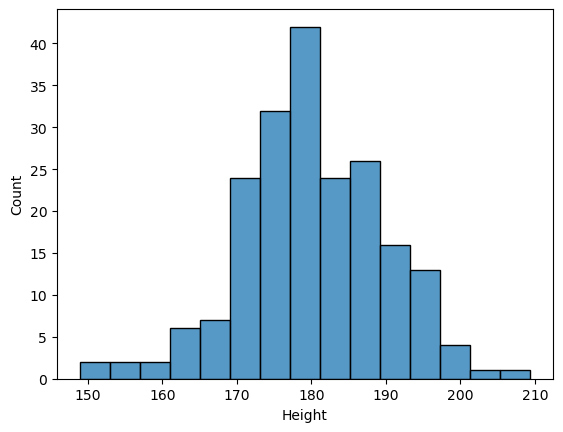

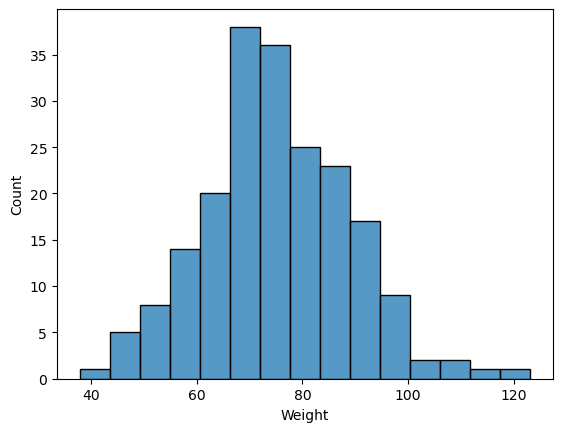

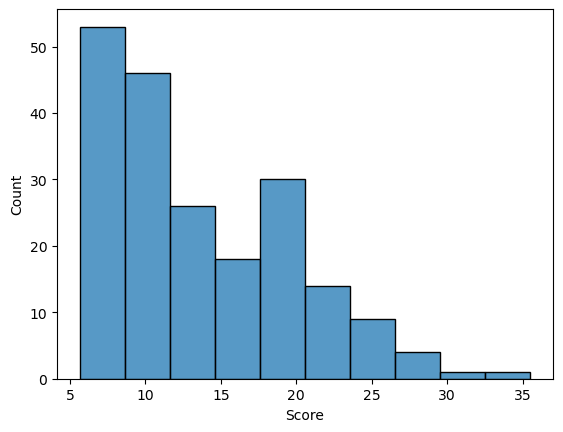

In [7]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.histplot(x=data[i])
        plt.show()

### KDE PLOT

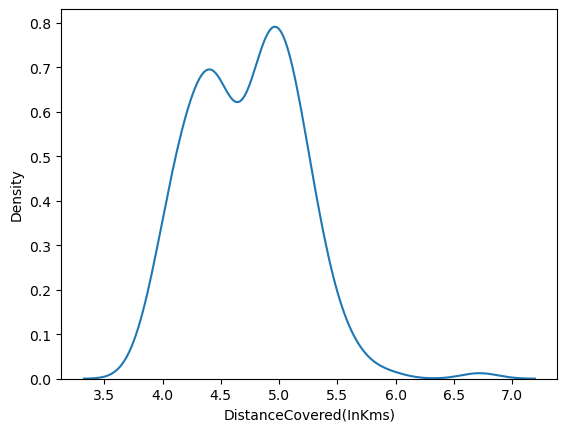

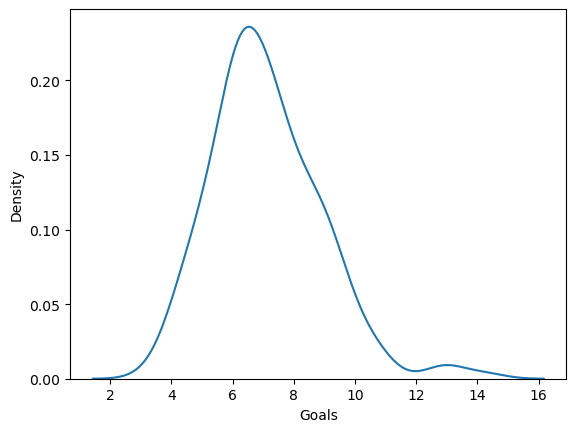

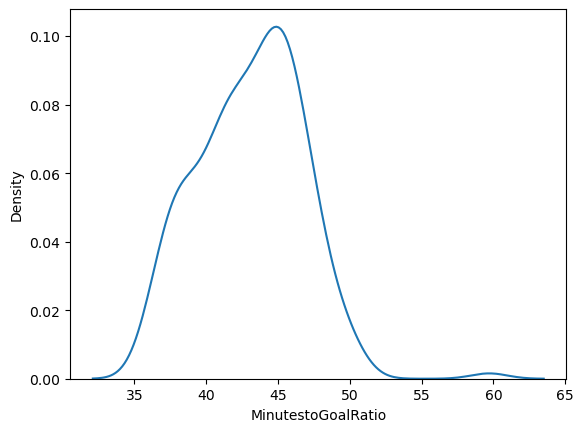

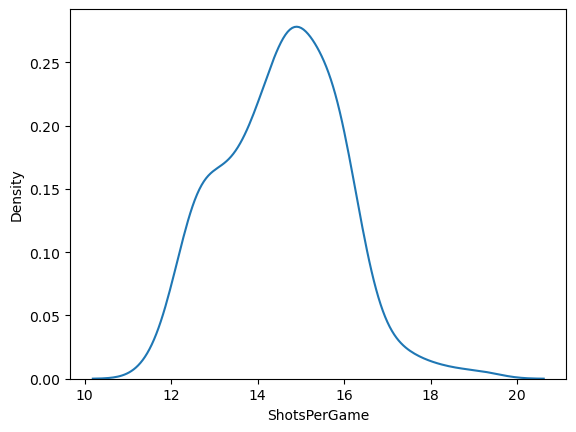

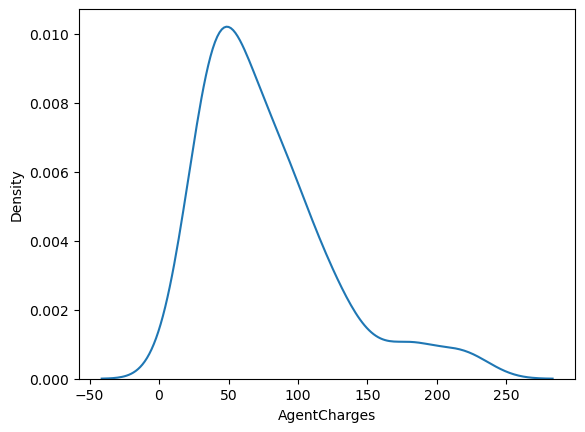

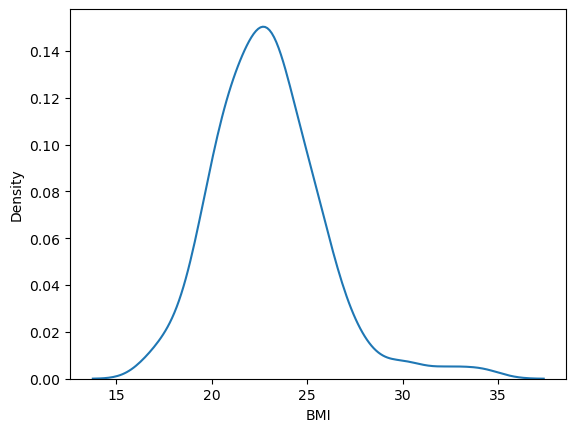

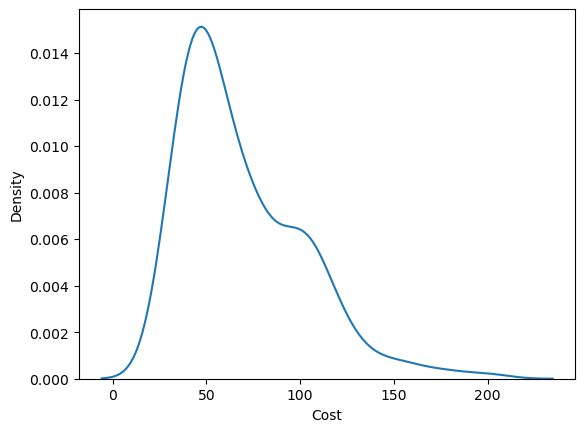

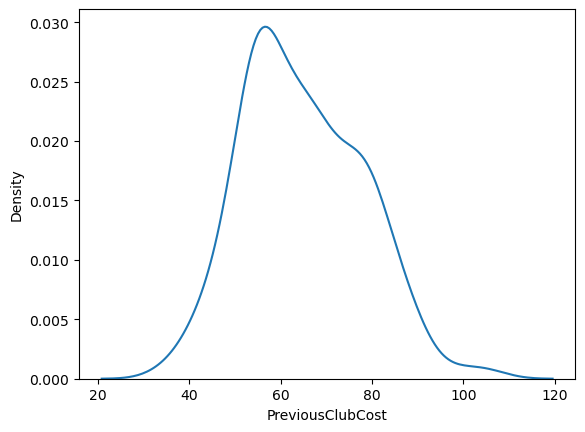

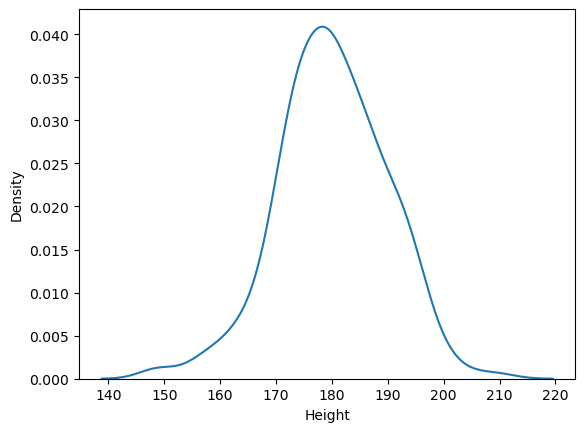

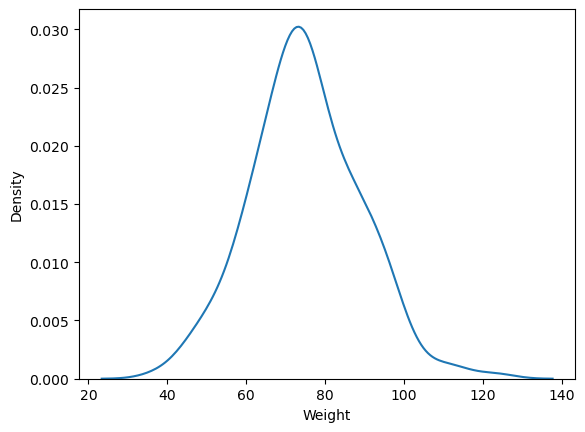

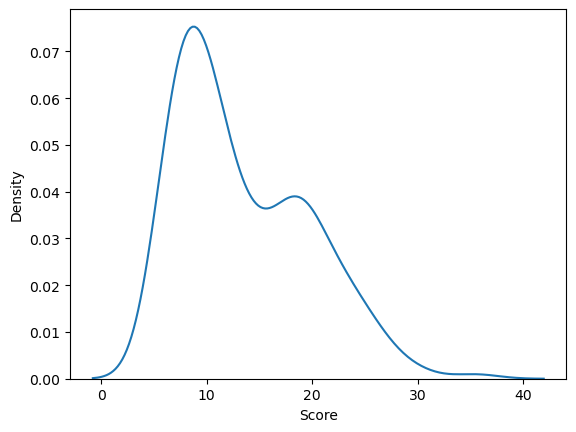

In [8]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i])
        plt.show()

### BOX PLOT

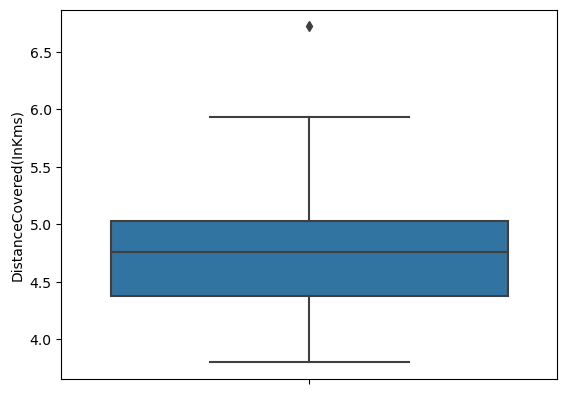

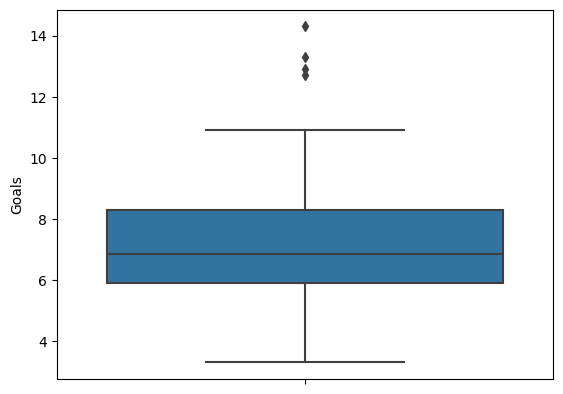

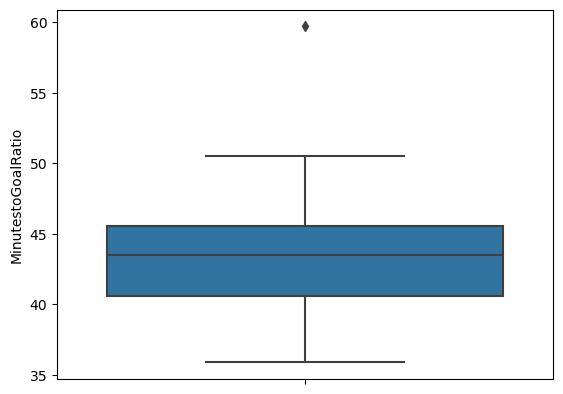

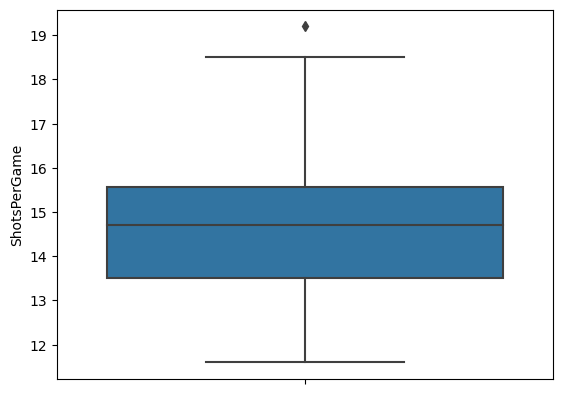

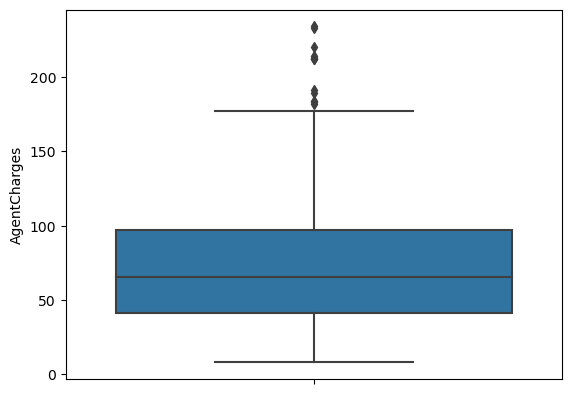

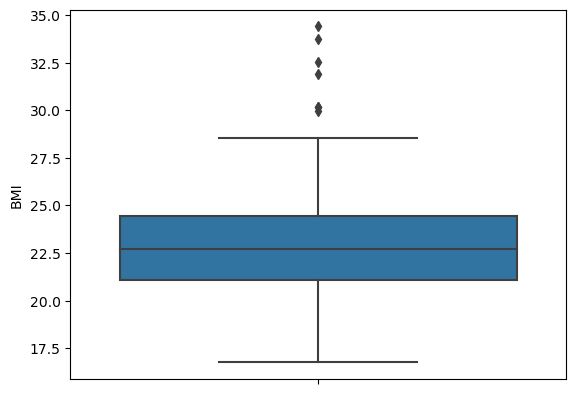

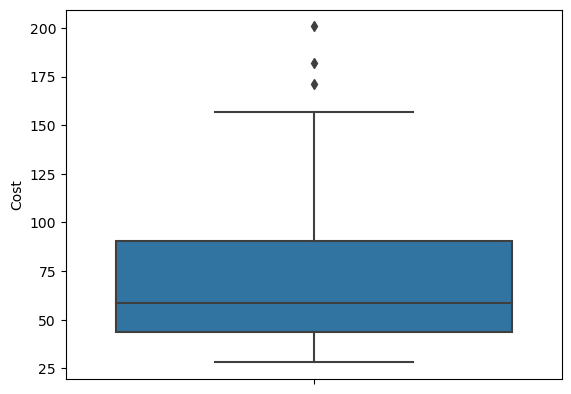

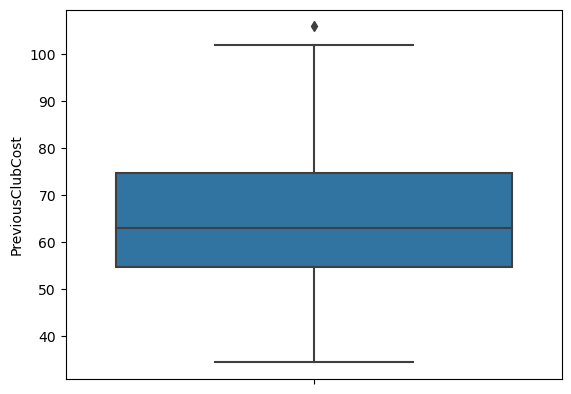

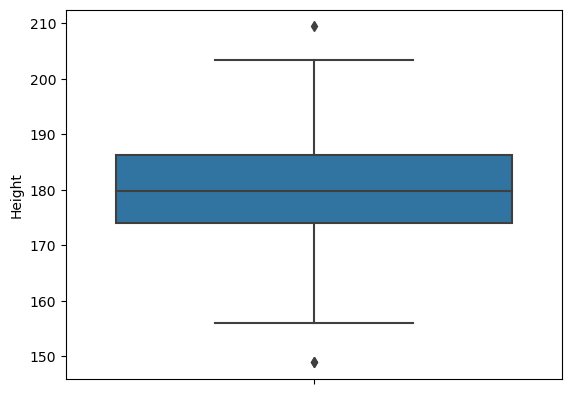

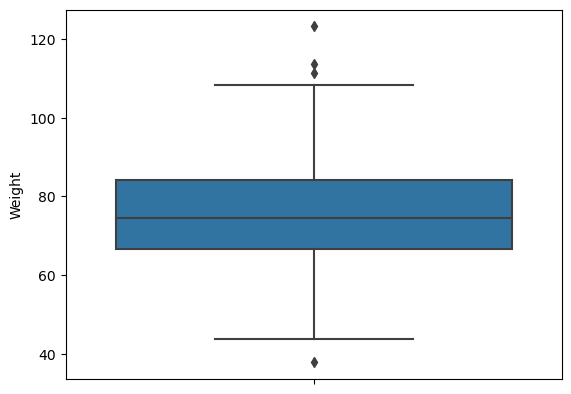

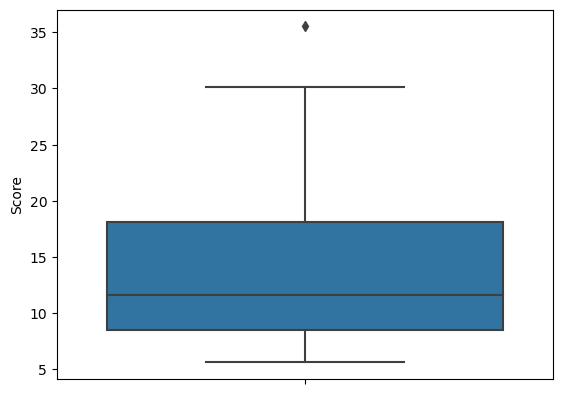

In [9]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

## MULTIVARIATE ANALYSIS

### BAR PLOT

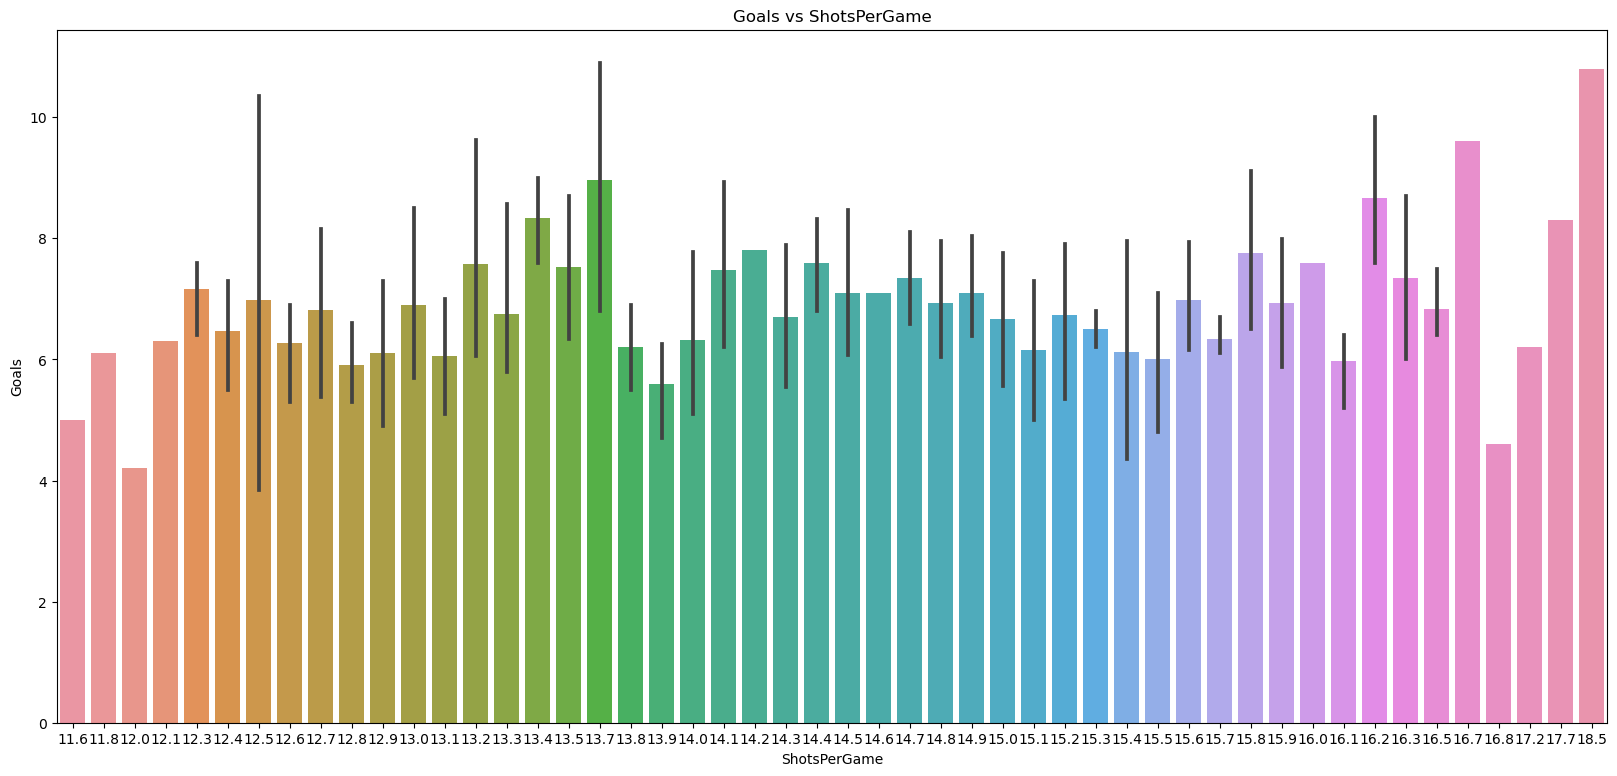

In [32]:
plt.figure(figsize=(20,9))
plt.title("Goals vs ShotsPerGame")
sns.barplot(x='ShotsPerGame',y='Goals',data=data);

### PAIR PLOT

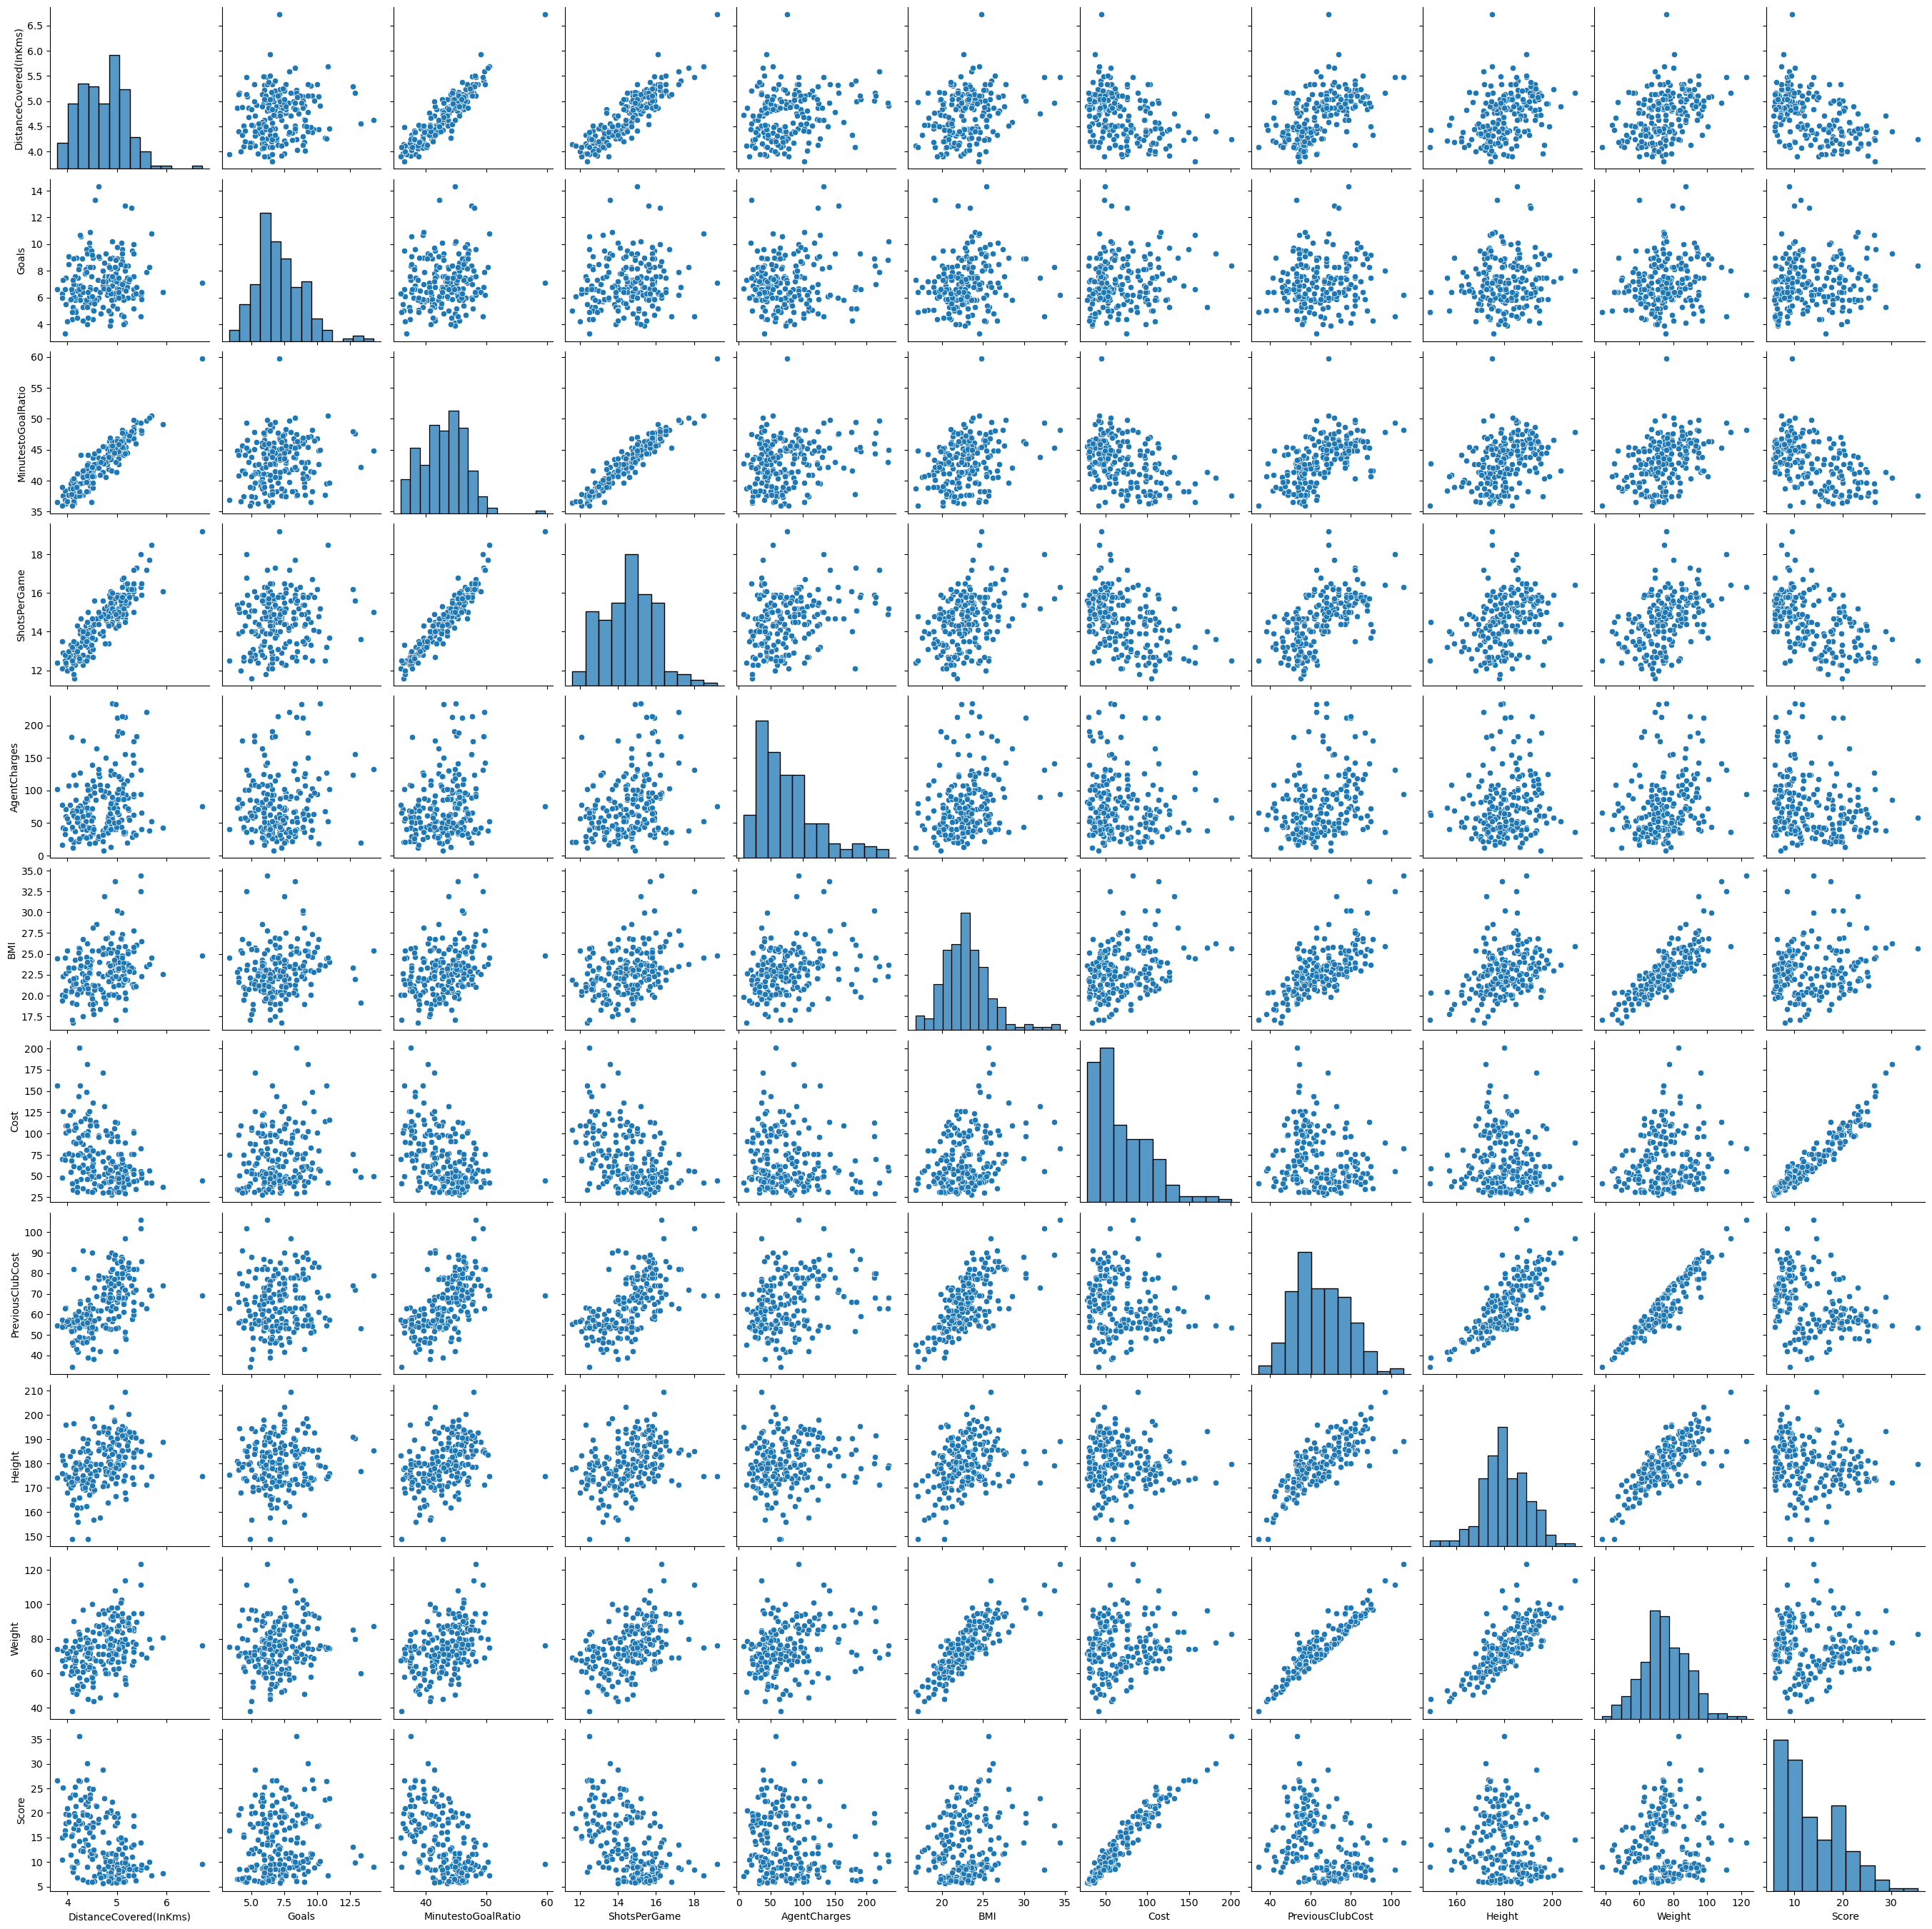

In [11]:
sns.pairplot(data=data)
plt.show()

### LINE PLOT

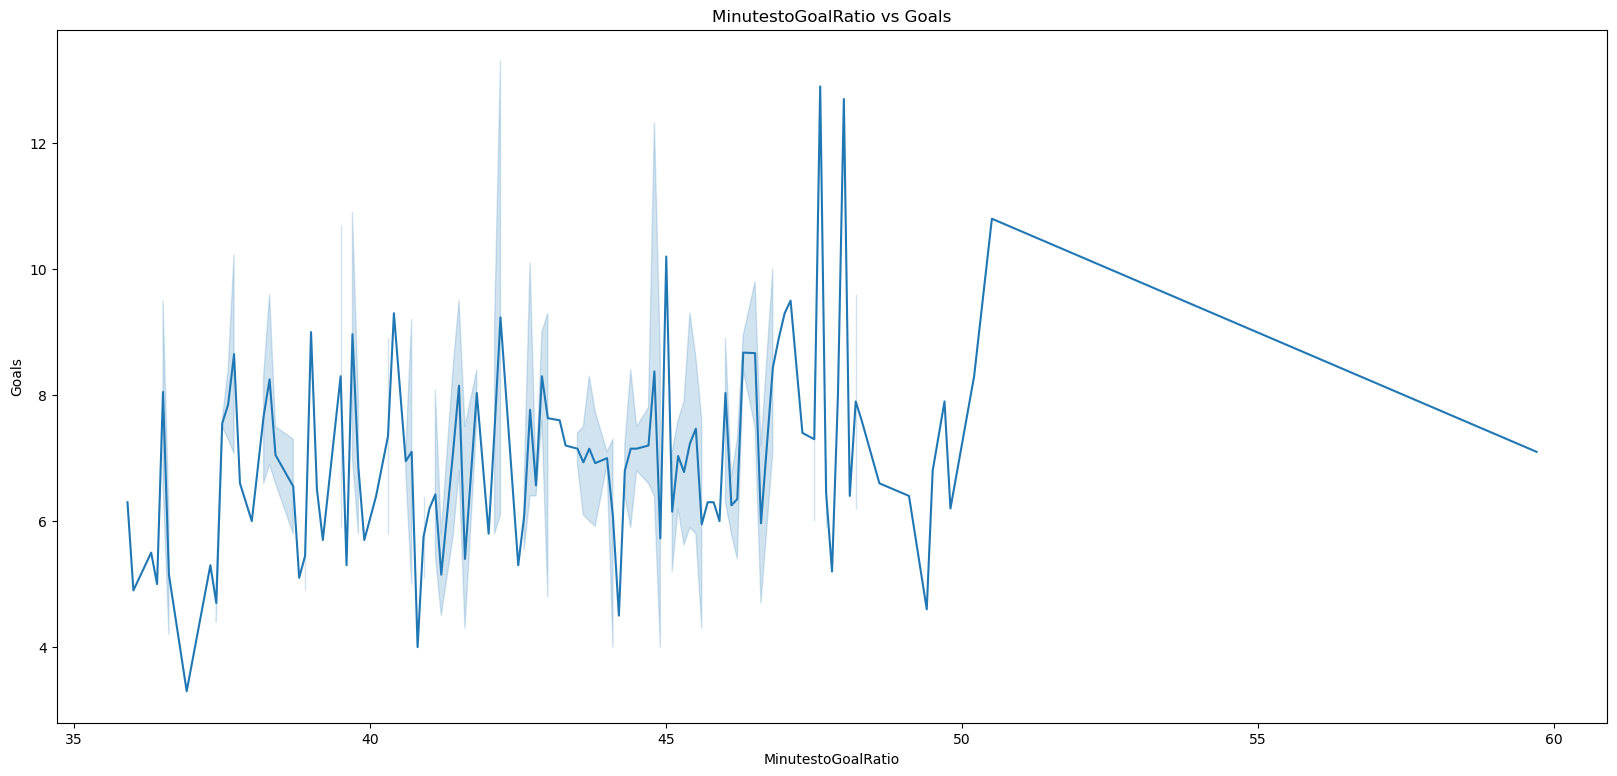

In [12]:
plt.figure(figsize=(20,9))
plt.title("MinutestoGoalRatio vs Goals")
sns.lineplot(x='MinutestoGoalRatio',y='Goals',data=data);

In [13]:
data.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


## LABEL ENCODING

In [14]:
cols=["PlayerName","Club"]
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    int32  
 1   Club                    202 non-null    int32  
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int32(2), int64(1)
memory usage: 19.1 KB


## OUTLIER TREATMENT

In [16]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [17]:
for column in data.columns:
    if data[column].dtype!="object":
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])
        

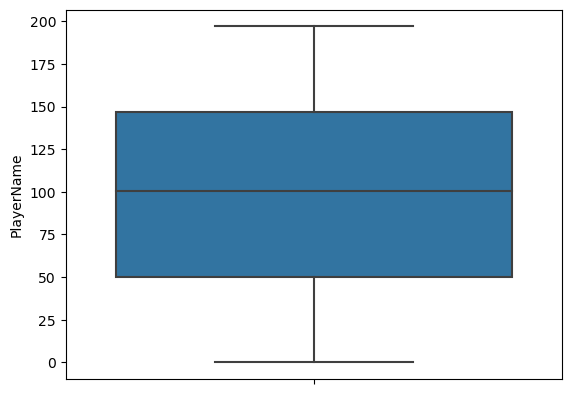

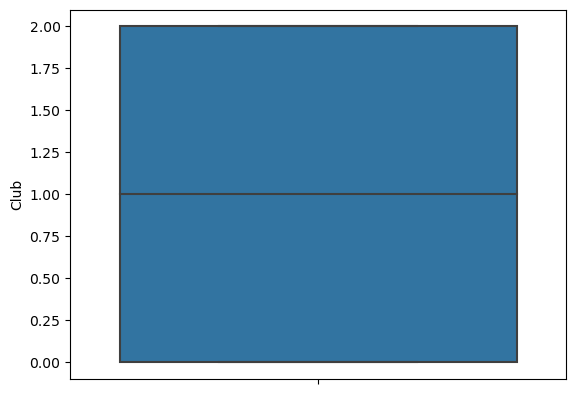

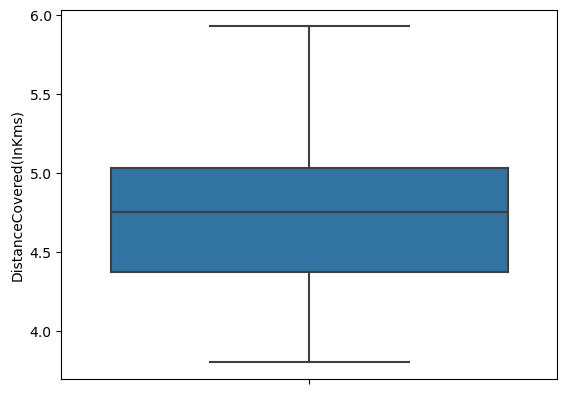

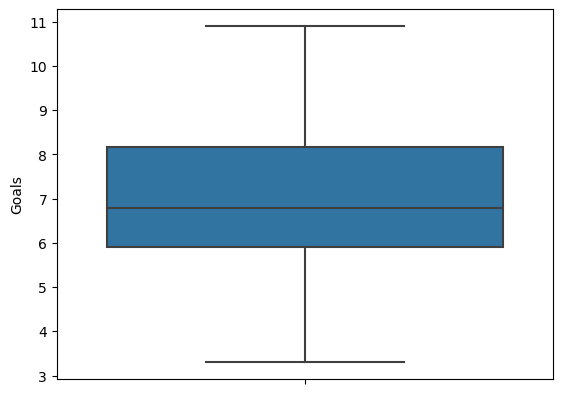

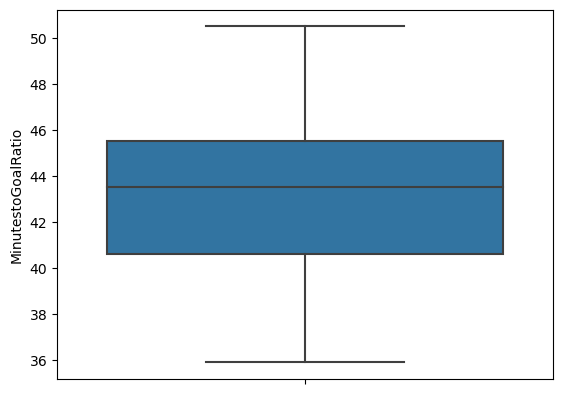

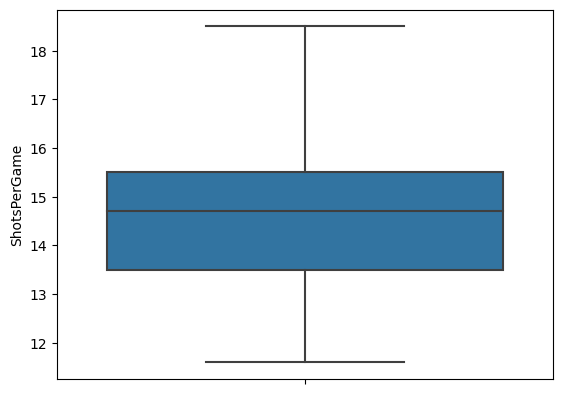

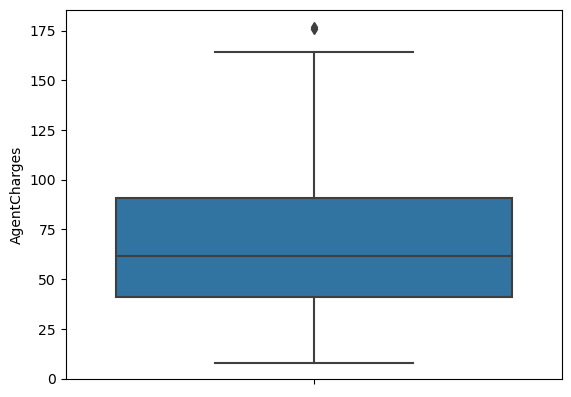

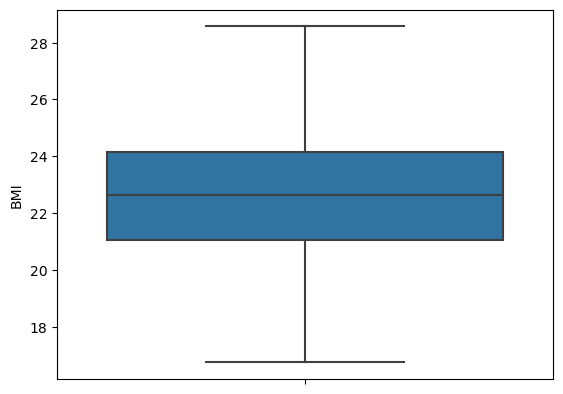

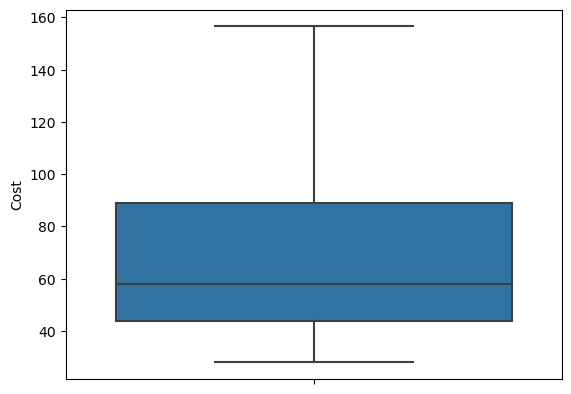

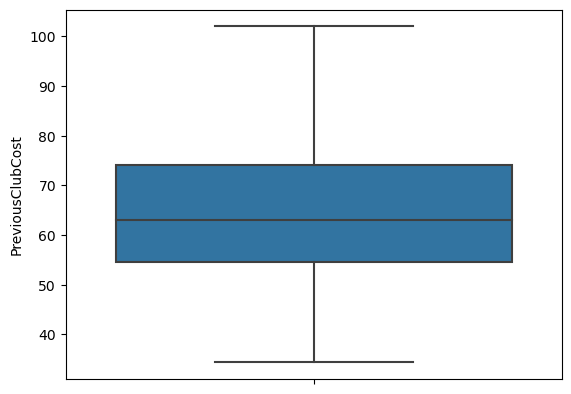

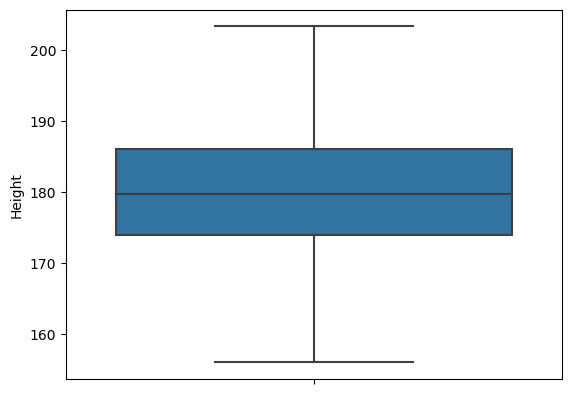

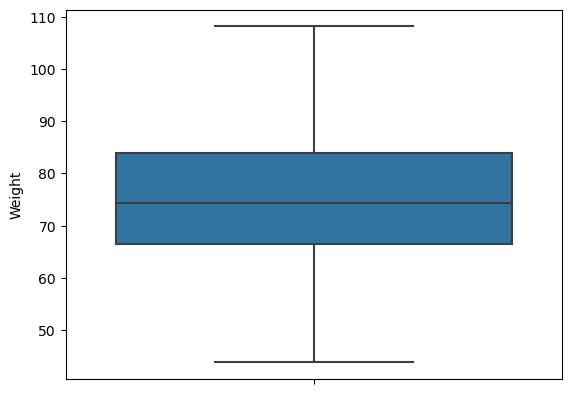

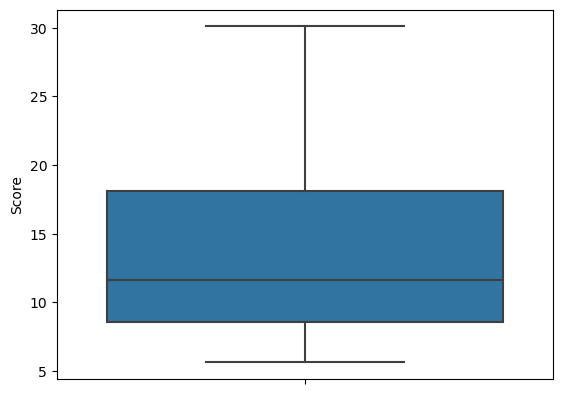

In [18]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.boxplot(y=data[i])
        plt.show();

#### DROP NA VALUES

In [19]:
data.dropna(inplace=True)

### FINDING CORRELATION WITH OTHER COLUMNS

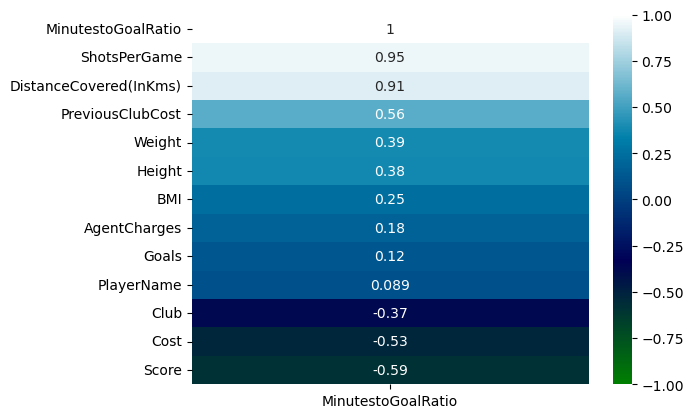

In [20]:
sns.heatmap(data.corr()[["MinutestoGoalRatio"]].sort_values(by="MinutestoGoalRatio",ascending=False),vmin=-1,vmax=1,annot=True,cmap="ocean");

### SELECTING COLUMNS WITH MORE CORRELATION

In [21]:
x=data[["ShotsPerGame","DistanceCovered(InKms)","PreviousClubCost"]].values
y=data[["MinutestoGoalRatio"]].values

### FEATURE SCALING

In [22]:
sc=StandardScaler()

In [23]:
x=sc.fit_transform(x)

## CROSS VALIDATION

In [24]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor()

}

In [25]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average= np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.8996017541959738
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.9003958156343336
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.9621580736306281
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1.3337071773978912
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.1010335434761205
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.1394693533470321
******************************************

In [26]:
model=LinearRegression()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(x)

In [30]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,37.5,37.172382
1,38.2,39.128305
2,36.4,36.538068
3,37.3,38.102756
4,41.5,41.394388


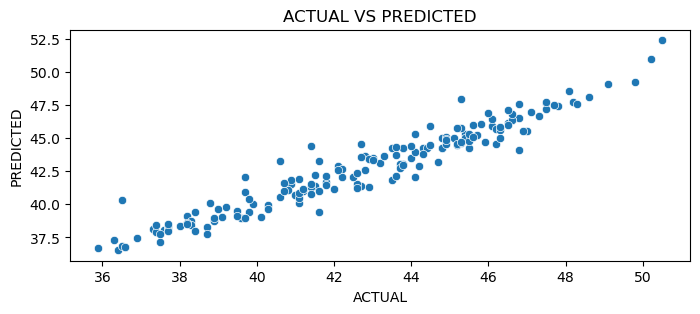

In [31]:
plt.figure(figsize=(8,3))
plt.title("ACTUAL VS PREDICTED")
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");